# mrob library intro

## Representations of rotations:
- Euler angles (1)
- Quaternions
- Axis-angle (2)
- Rotation matrix (3)

Actually, we used (1), (2), (3) for rotations in 2D on Perception course 

<img src="./files/maxresdefault.jpg"/>

[source](https://www.youtube.com/watch?v=a59YQ4qe7mE)


## Axis-angle representation in 3D
# &nbsp;&nbsp;&nbsp;&nbsp; $\pmb{\theta} = \theta \begin{pmatrix} e_1\\ e_2\\ e_3 \end{pmatrix} = \begin{pmatrix} \theta_1\\ \theta_2\\ \theta_3 \end{pmatrix}$  <img src="./files/angle_axis_vector.png" width="250" align="left"/>

[[source]](https://en.wikipedia.org/wiki/Axis–angle_representation)

## Rotation of vector

### $\pmb{r}' = R \pmb{r}$

## Axis-angle $\rightarrow$ Rotation matrix
$$\boxed{ 
    R = \operatorname{Exp}(\pmb{\theta}
)},$$
<br>

$$\operatorname{Exp}(\pmb{\theta}) = I + \frac{sin(\theta)}{\theta} \pmb{\theta}\hat{} + \frac{1 - cos(\theta)}{\theta^2}(\pmb{\theta}\hat{})^2$$

$$\pmb{\theta}\hat{} = 
\begin{pmatrix}
    0 & -\theta_3 & \theta_2 \\
    \theta_3 & 0 & -\theta_1\\
    -\theta_2 & \theta_1 & 0 \\
\end{pmatrix}$$

$$$$

### Rotation matrices for 3D-space. SO(3)

$R \in SO(3)$ (Special Orthogonal Group of 3D matrices)

### Formal definition

$SO(3) = \{
    R \in \mathbb{R}^{3\times3}: R^\top R = I, \operatorname{det}(R)=1
\}$

## MROB: Mobile Robotics library

Important features:
- written in C++
- has python API `mrob`
- has Rigid Body Transformations library

In [1]:
import mrob

## Example 1. Vector rotation

In [2]:
import numpy as np
import pandas as pd
from scipy.linalg import inv
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
r = [1,0,0]; 
theta = [0,0,np.pi/6]; 
R = mrob.SO3(theta).R() #It is Exp(theta)
r_ = R @ r

In [4]:
def plott(sbplt, r, r_, names=True):
    axis_len = 1.4
    axis = fig.add_subplot(sbplt, projection='3d')
    axis.quiver([0,0,0], [0,0,0], [0,0,0], [axis_len,0,0], [0,axis_len,0], [0,0,axis_len], 
                color='k', 
                #arrow_length_ratio=0, 
                #linestyle='--',
                linewidth=0.7
               )
    axis.view_init(elev=12, azim=45)
    axis.set_xlim(-axis_len/1.1,axis_len/1.1)
    axis.set_ylim(-axis_len/1.1,axis_len/1.1)
    axis.set_zlim(-axis_len/1.1,axis_len/1.1)
    axis.set_aspect('equal')
    plt.axis('off')
    axis.text(axis_len*1.2,0,0, 'X')
    axis.text(0,axis_len*1.1,0, 'Y')
    axis.text(0,0,axis_len*1.1, 'Z')
    plt.title(r'$\theta\approx${}, $e\approx${}'.format(np.round(np.linalg.norm(theta),2), 
                                                        np.round(theta/np.linalg.norm(theta),2)))
    axis.quiver(0,0,0, r[0], r[1], r[2], color='#00af00', arrow_length_ratio=0.1)#, linestyle='-')
    axis.quiver(0,0,0, r_[0], r_[1], r_[2], color='#00ff00', arrow_length_ratio=0.1, alpha=0.6)#, linestyle='--')
    if names:
        axis.text(r[0]*1.1, r[1]*1.1, r[2]*1.1, 'r')
        axis.text(r_[0]*1.1, r_[1]*1.1, r_[2]*1.1, 'r_')
    plt.show()

<IPython.core.display.Javascript object>


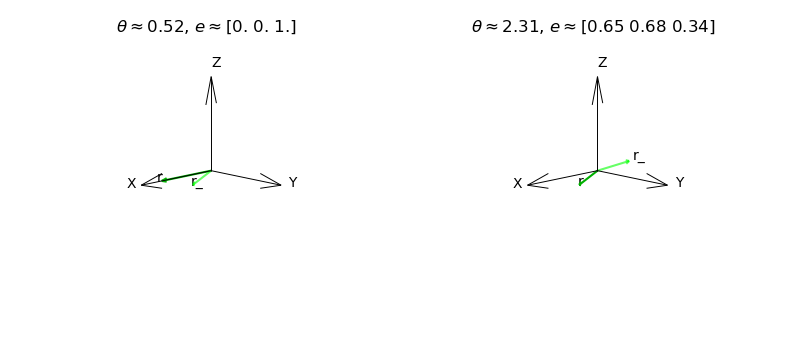

[[1.   0.   0.  ]
 [0.87 0.5  0.  ]]

 [[0.87 0.5  0.  ]
 [0.27 0.91 0.32]]


In [5]:
fig = plt.figure(figsize=(8,3.5))
plott(121, r, r_)
print(np.round((r, r_),2))
r = r_; theta = [1.5, np.pi/2, np.pi/4]; r_ = mrob.SO3(theta).R()@r
plott(122, r, r_)
print('\n', np.round((r, r_),2))
plt.tight_layout()

## Example 2. Interpolation

<IPython.core.display.Javascript object>


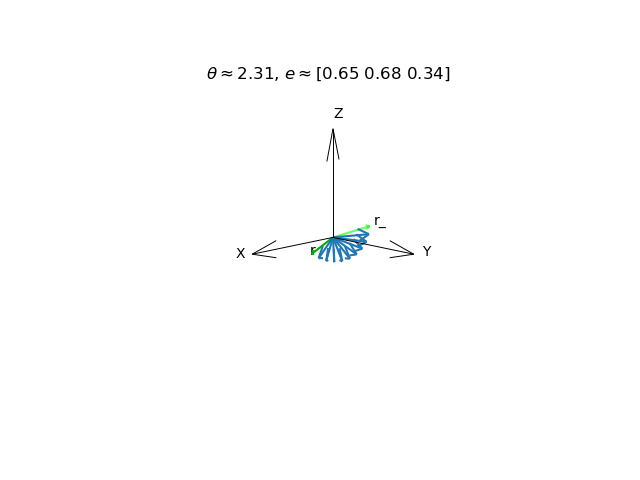

In [6]:
fig = plt.figure()
plott(111, r, r_)
for t in np.arange(0.1,1,0.1):
    rr = mrob.SO3(np.array(theta)*t).R()@r
    plt.quiver(0,0,0, rr[0], rr[1], rr[2])

## Example 3. Pose visualization

In [7]:
mocap_col_names=['fr','sfr','rx','ry','rz','tx','ty','tz']
#mocap = pd.read_csv('../../data/sk_mocap/box.csv', names=mocap_col_names, skiprows=5)
mocap = pd.read_csv('files/box.csv', names=mocap_col_names, skiprows=5)
mocap.head(1)

,fr,sfr,rx,ry,rz,tx,ty,tz
0,1,0,-0.001286,-0.000463,0.029577,-228.908,288.046,771.933


In [8]:
data = np.array([mocap.tx, mocap.ty, mocap.tz, mocap.rx, mocap.ry, mocap.rz])
# displacements in meters
data[:3] = data[:3]/1000
rate = 200
dt = 1/rate
t = np.arange(0, dt*data.shape[0], dt)
tr_st = np.array([
    4600,8400,13000,16600,20400,26400,31000,37400,43000, 
    48000,55000,60000,66000,72000, mocap.shape[0]
])

track0 = data[:, tr_st[3]:tr_st[4]]
track1 = data[:, tr_st[10]:tr_st[11]]

<IPython.core.display.Javascript object>


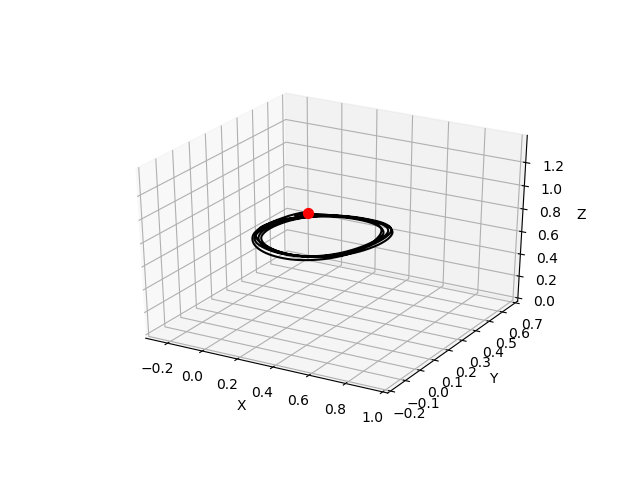

In [9]:
track = track0

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')
axis.plot(track[0], track[1], track[2], 'k')
axis.scatter(track[0,0], track[1,0], track[2,0], c='r', s=50)
axis.set_xlabel('X'); axis.set_ylabel('Y'); axis.set_zlabel('Z')
axis.set_xlim(-0.3,1); axis.set_ylim(-0.2,0.7); axis.set_zlim(0,1.4)
axis.set_aspect('equal')
plt.show()

In [10]:
def settings():
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_zlabel('Z')
    axis.set_xlim(-0.3,1)
    axis.set_ylim(-0.2,0.7)
    axis.set_zlim(0.6,1.4)
    axis.set_aspect('equal')
    plt.show()

<IPython.core.display.Javascript object>


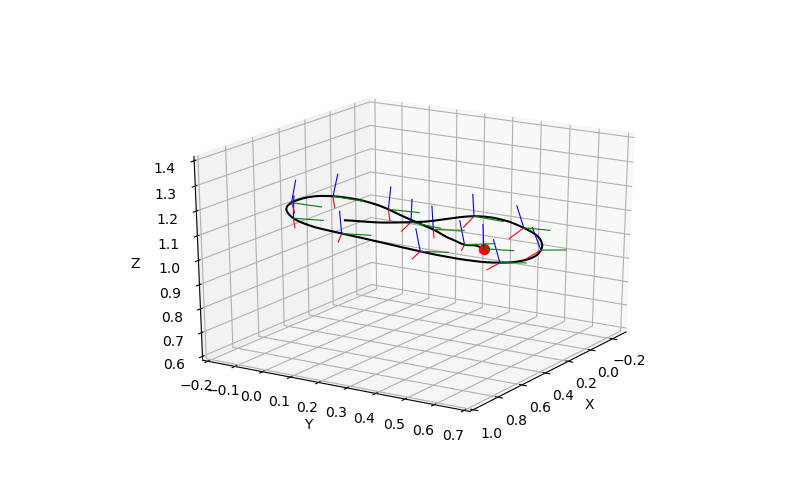

In [11]:
track = track0[:, 2000:2600]
track = track1[:, 2200:2900]
fig = plt.figure(figsize=(8,5))
axis = fig.add_subplot(111, projection='3d')
for tx,ty,tz,rx,ry,rz in track[:, 2:-1:50].T:
    x, y, z = np.array([tx]*3), np.array([ty]*3), np.array([tz]*3)
    u, v, c = mrob.SO3([rx,ry,rz]).R()*0.10
    axis.quiver(x, y, z, u, v, c, arrow_length_ratio=0, color=['r','g','b'], linestyle='-', linewidth=0.8)
axis.view_init(elev=22, azim=32)
axis.plot(track[0], track[1], track[2], 'k')
axis.scatter(track[0,0], track[1,0], track[2,0], c='r', s=50)
settings()

## Rotation matrix $\rightarrow$ Axis-angle
$$\boxed{ 
    \pmb{\theta} = \operatorname{Ln}(R)}$$
    
## Example 4. Get axis-angle

In [12]:
def get_some_R():
    return mrob.SO3(np.random.uniform(0.0, 0.5, size=3)).R()

In [13]:
R = get_some_R(); R = np.eye(3)

mrob_obj = mrob.SO3(R)
theta = mrob_obj.ln()
theta

array([-0.,  0., -0.])

*Note. Yo can init `mrob_obj` either by $R$ or $\pmb{\theta}$: `mrob.SO3(R)`, `mrob.SO3(theta)`*

## Useful example for SLAM

Distance between $R_1$ znd $R_2$:

$\| \operatorname{Ln}(R_1 R_2^{-1}) \|_2$ instead of $\| R_1 - R_2\|_F$

## Transformation matrices for 3D-space. Special Eucledian Group SE(3)

$ SE(3) = \left\{T=\begin{pmatrix} R & \pmb{t} \\ \pmb{0}^\top & 1 \end{pmatrix}, R \in SO(3), \pmb{t} \in \mathbb{R}^3 \right\}$ 

In `mrob` you can use `mrob.SE3.T()` just like `mrob.SO3.R()`, etc. 

## Example 5. Interpolation in SE(3)

<IPython.core.display.Javascript object>


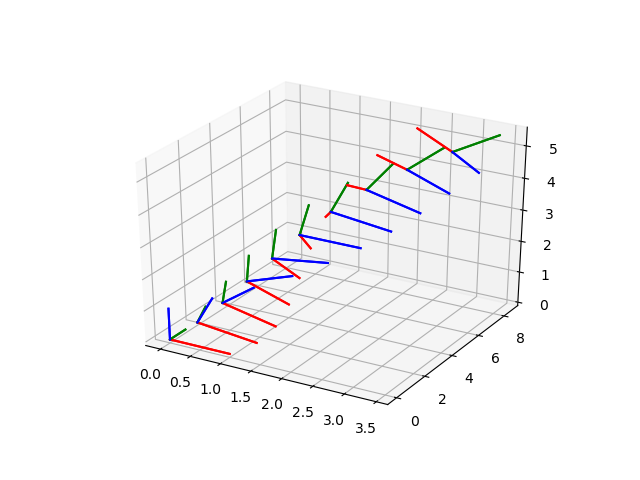

<IPython.core.display.Javascript object>


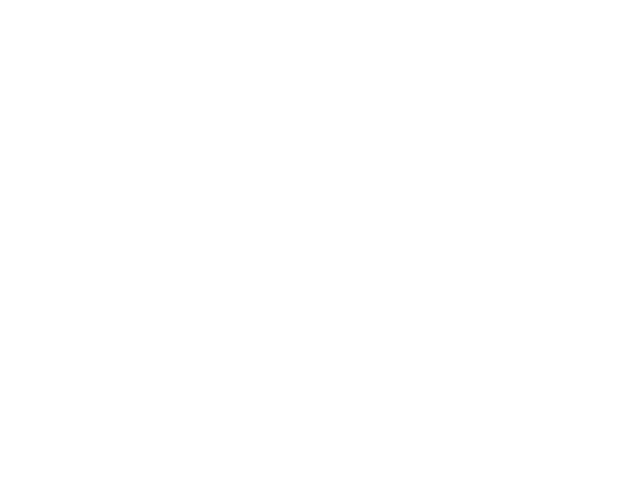

In [14]:
%run ./files/SE3_interpolation.py

## The main inference

$$\operatorname{Exp}: \mathbb{R}^3 \ni \pmb{\theta} \rightarrow R \in SO(3)$$
$$$$
$$\operatorname{Ln}: SO(3) \ni R \rightarrow \pmb{\theta} \in \mathbb{R}^3$$

##### <center> `mrob_obj.R()` and `mrob_obj.ln()` respectively</center>

##### Note. $\pmb{\theta}$ must satisfy $\| \pmb{\theta} \|_2 < \pi$ for bijection between Exp and Log.

## Use `mrob`, please.

### Instructions for instalation
**https://cdise-bitbucket.skoltech.ru/projects/MR/repos/mrob/browse**

### Extension the default python search path for mrob on MAC (Linux in similar way):  
Add string `export PYTHONPATH=$PYTHONPATH:/bla/bla/bla/mrob/lib` into **$HOME/.bashrc** file  

Sources:
- Lecture video by Prof. V. Balakrishnan [Mod-13 Lec-34 The rotation group and all that (Part I)](https://www.youtube.com/watch?v=wIn_dlmD8sk)
- Paper [A micro Lie theory for state estimation in robotics](https://arxiv.org/abs/1812.01537)